# Welcome to my Computer Vision notebook


## Table of Contents
1. [Introduction](#Introduction)
2. [Loading and Displaying an Image](#Loading-and-Displaying-an-Image)
3. [Image Processing](#Image-Processing)
   - [Grayscale Conversion](#Grayscale-Conversion)
   - [Black and White Conversion](#Black-and-White-Conversion)
   - [Color Channel Extraction](#Color-Channel-Extraction)
   - [HSV Conversion](#HSV-Conversion)
   - [Channel Merging](#Channel-Merging)
4. [Face Detection and Recognition](#Face-Detection-and-Recognition)
5. [Conclusion](#Conclusion)


## Introduction
<a id="Introduction"></a>
* Import packages

In [1]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt 
cv2.__version__ 

'4.10.0'

<a id="Loading-and-Displaying-an-Image"></a>
## Loading and Displaying an Image

In [2]:
input = cv2.imread("data/input.jpg") # read the image
cv2.imshow("Hello World", input) # show the image
cv2.waitKey() # wait for any key to be pressed
cv2.destroyAllWindows() # close the window

In [3]:
input.shape # get the shape of the image

(830, 1245, 3)

* It is tensor

In [4]:
input 

array([[[12, 18, 31],
        [12, 18, 31],
        [11, 17, 30],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       [[12, 18, 31],
        [12, 18, 31],
        [12, 18, 31],
        ...,
        [21, 24, 38],
        [21, 24, 38],
        [21, 24, 38]],

       ...,

       [[ 4,  7, 12],
        [ 4,  7, 12],
        [ 3,  7, 12],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 3,  6, 11],
        ...,
        [18, 23, 38],
        [19, 24, 39],
        [20, 25, 40]],

       [[ 3,  6, 11],
        [ 3,  6, 11],
        [ 2,  5, 10],
        ...,
        [18, 23, 38],
        [18, 23, 38],
        [19, 24, 39]]], dtype=uint8)

## Image Processing

In [5]:
from skimage import data
import matplotlib.pyplot as plt

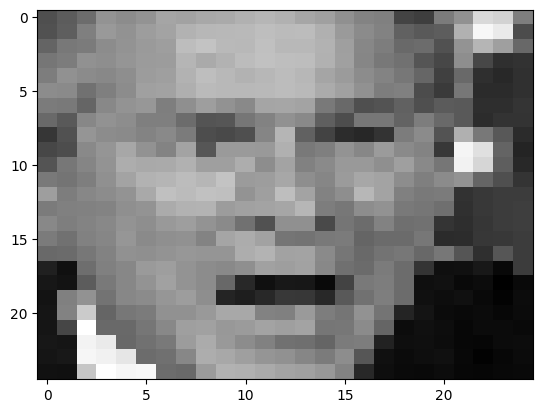

In [6]:
bush = data.lfw_subset()
plt.imshow(bush[0], cmap='gray', interpolation='nearest', aspect='auto', origin='upper')

((512, 512, 3), dtype('uint8'))

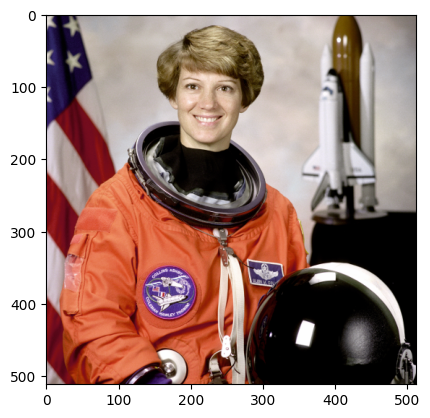

In [7]:
image = data.astronaut()
plt.imshow(image);   
image.shape , image.dtype

### Grayscale Conversion
<a id="Grayscale-Conversion"></a>

In [9]:
import cv2 
image = cv2.imread("data/input.jpg")
cv2.imshow("Original", image)
cv2.waitKey()
cv2.destroyAllWindows()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("GrayScale", gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

<a id="Black-and-White-Conversion"></a>
### Black and White Conversion

In [11]:
import cv2 
image = cv2.imread("data/input.jpg",0)
cv2.imshow("BW", image)
cv2.waitKey()
cv2.destroyAllWindows()

### Color Channel Extraction
<a id="Color-Channel-Extraction"></a>

In [12]:
import cv2
image = cv2.imread("data/input.jpg")
B, G, R = image[0, 0]
print(B, G, R)

12 18 31


### HSV Conversion
<a id="HSV-Conversion"></a>

In [13]:
import cv2 
image =  cv2.imread("data/input.jpg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2.imshow("Hue Channel", hsv_image[:, :, 0])
cv2.waitKey()
cv2.imshow("Saturation Channel", hsv_image[:, :, 1])
cv2.waitKey()
cv2.imshow("Value Channel", hsv_image[:, :, 2])
cv2.waitKey()
cv2.destroyAllWindows()

### Channel Merging
<a id="Channel-Merging"></a>

In [15]:
import cv2 
image =  cv2.imread("data/input.jpg")
B,G,R = cv2.split(image)
cv2.imshow("Red",R)
cv2.waitKey()
cv2.imshow("Green", G)
cv2.waitKey()
cv2.imshow("Blue", B)
cv2.waitKey()
merged = cv2.merge([B,G,R])
cv2.imshow("Merged", merged)
cv2.waitKey()
merged = cv2.merge([B+100,G,R])
cv2.imshow("Merged with Blue Amplified", merged)

cv2.waitKey()
merged = cv2.merge([B,G+100,R])
cv2.imshow("Merged with Green Amplified", merged)

cv2.waitKey()
cv2.destroyAllWindows()

## Edge Detection

In [16]:
image = cv2.imread('data/input.jpg',0)

height,width = image.shape[:2]

sobel_x = cv2.Sobel(image,cv2.CV_64F,0,1,ksize = 5)
sobel_y = cv2.Sobel(image,cv2.CV_64F,1,0,ksize = 5)

cv2.imshow('Rotated Image',image)
cv2.waitKey(0)
cv2.imshow('Sobel X',sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y',sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x,sobel_y)
cv2.imshow('sobel_OR',sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.waitKey(0)

canny = cv2.Canny(image,50,120)
cv2.imshow('Canny',canny)
cv2.waitKey(0)


cv2.destroyAllWindows()


## Live Sketch

In [17]:
import cv2
def sketch(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # convert the image to grayscale

    img_gray_blur = cv2.GaussianBlur(img_gray,(5,5),0) # 5,5 is the kernel size, 0 is the standard deviation. Blur the image
    canny_edges = cv2.Canny(img_gray_blur,10,70) # 10 is the lower threshold, 70 is the upper threshold for the edges.
    ret,mask = cv2.threshold(canny_edges,250,255,cv2.THRESH_BINARY_INV) # invert the image
    return mask # return the mask

cap = cv2.VideoCapture(0) # 0 for default camera

while True:
    ret,frame = cap.read() # ret is boolean, frame is the frame
    cv2.imshow('Our live Sketcher',sketch(frame)) # show the sketch
    if cv2.waitKey(1) == 13: # press ENTER to break
        break
cap.release() # release the camera
cv2.destroyAllWindows() 
print('done') 

done


## Template matching

* Where is Waldo ?

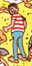

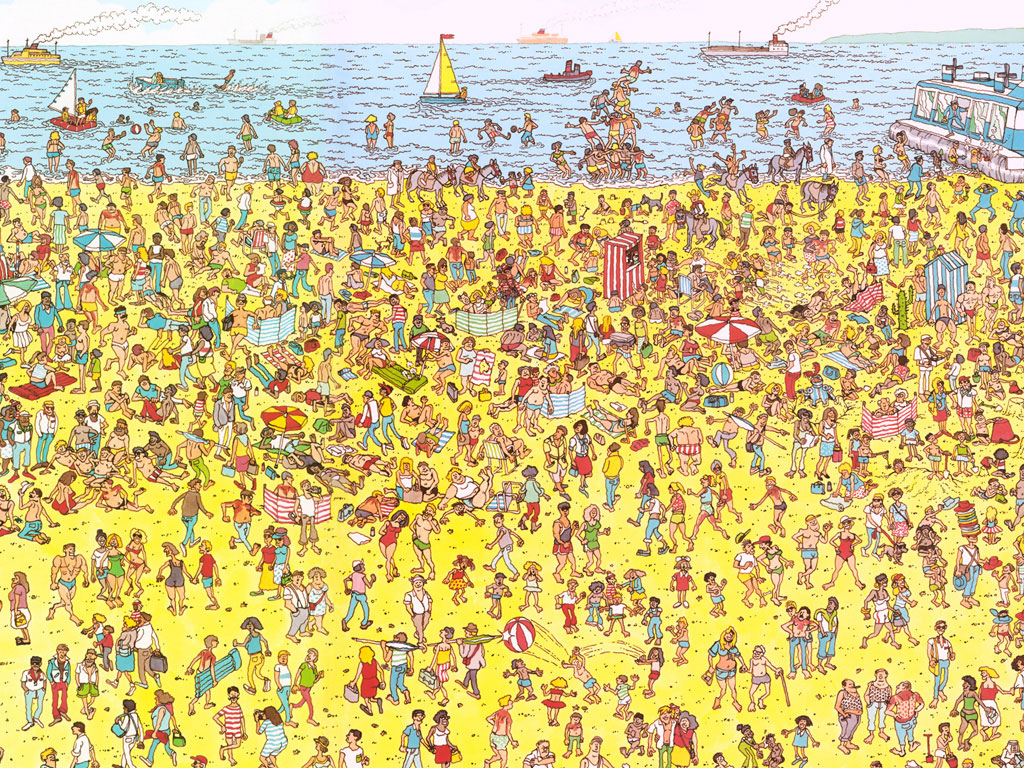

In [21]:
import cv2
image = cv2.imread("data/WaldoBeach.jpg")

cv2.imshow("Where is Waldo",image) 
cv2.waitKey(0) 
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) # convert the image to grayscale

template = cv2.imread("data/waldo.jpg",0) # read the template

result = cv2.matchTemplate(gray,template,cv2.TM_CCOEFF) # match the template
minVal,maxVal,minLoc,maxLoc = cv2.minMaxLoc(result) # get the min and max values and their locations

top_left = maxLoc # top left corner
bottom_right =(top_left[0] + 35, top_left[1]+70) # 50 is the width and height of the template
cv2.rectangle(image,top_left,bottom_right,(0,0,255),5) # draw the rectangle

cv2.imshow("Where is Waldo",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

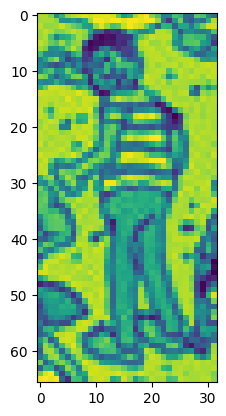

In [22]:
plt.imshow(template);

### If we have just one image. What can be done?
* Data Augmentation - 10k different images can be created.

* Flip images 

In [23]:
import cv2
image = cv2.imread("data/input.jpg")
flipped = cv2.flip(image,1)
cv2.imshow("Original", image)
cv2.waitKey()
cv2.imshow("Flipped", flipped)
cv2.waitKey()
cv2.imshow("Flipped Horizontally", cv2.flip(image,0))
cv2.waitKey()
cv2.imshow("Flipped Vertically", cv2.flip(image,-1))
cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
cap = cv2.VideoCapture("data/airplanes.mp4") 
# cap = cv2.VideoCapture(0) # 0 for default camera

while True:
    ret,frame= cap.read() # ret is boolean, frame is the frame
    if ret:
        cv2.imshow("Demo",frame) # show the frame
    else:
        break
    key = cv2.waitKey(10) # wait for 10 ms
    if key == ord("q"): # press q to break
        break

cv2.destroyAllWindows()

In [25]:
cap = cv2.VideoCapture("data/cars.mp4") 
# cap = cv2.VideoCapture(0) # 0 for default camera

while True:
    ret,frame= cap.read() # ret is boolean, frame is the frame
    if ret:
        cv2.imshow("Demo",frame) # show the frame
    else:
        break
    key = cv2.waitKey(10) # wait for 10 ms
    if key == ord("q"): # press q to break
        break

cv2.destroyAllWindows()

In [26]:
cap = cv2.VideoCapture(0)

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("data/Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()

In [27]:
cap = cv2.VideoCapture("data/cars.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("data/Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()

In [28]:
cap = cv2.VideoCapture("data/airplanes.mp4")

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)
    cv2.imshow("Motion",diff)
    frame1 = frame2
    ret,frame2 = cap.read()
    if not ret:
        cap.release()
        break
    key = cv2.waitKey(10)
    if key == ord("q"):
        cap.release()
        break
cv2.destroyAllWindows()


In [29]:
cap = cv2.VideoCapture(0)

ret1,frame1 = cap.read()
ret2,frame2 = cap.read()

while True:
    frame1_gray = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    frame2_gray = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    frame1_blur = cv2.GaussianBlur(frame1_gray,(21,21),0)
    frame2_blur = cv2.GaussianBlur(frame2_gray,(21,21),0)

    diff = cv2.absdiff(frame1_blur,frame2_blur)

    thresh = cv2.threshold(diff,20,255,cv2.THRESH_BINARY)[1]
    final = cv2.dilate(thresh,None,iterations=2)

    masked = cv2.bitwise_and(frame1,frame1,mask=thresh)
    white_pixels = np.sum(thresh) /255

    rows,cols = thresh.shape
    total= rows*cols
    if white_pixels > 0.01*total:
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame1,"Movement Detected - Hareket Var",(10,50),font,1,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Motion",frame1)
    frame1=frame2
    ret,frame2 = cap.read()
    if not ret:
        break
    key = cv2.waitKey(10)
    if key == 27 or key == ord("q"):
        break
cv2.destroyAllWindows()

In [30]:
# Read image
image = cv2.imread("data/Sunflowers.jpg")

# Set up the detector with default par ameters.
detector =cv2.SimpleBlobDetector_create()

# Detect blobs.
keypoints = detector.detect(image)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of
# the circle corresponds to the size of blob
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (255,0,0),
                                      cv2.DRAW_MATCHES_FLAGS_DEFAULT)

print(len(keypoints))
# Show keypoints
cv2.imshow("Blobs", blobs)
cv2.waitKey(0)
cv2.destroyAllWindows()


255


### Face Detection and Recognition
<a id="Face-Detection-and-Recognition"></a>

In [8]:
import cv2
import os

# Path to the classifier XML file
classifier_path = 'data/haarcascade_frontalface_default.xml'

# Check if the classifier file exists
if not os.path.exists(classifier_path):
    raise FileNotFoundError(f"Classifier file not found at {classifier_path}")

# Load the classifier
face_classifier = cv2.CascadeClassifier(classifier_path)

# Check if the classifier is loaded correctly
if face_classifier.empty():
    raise IOError(f"Failed to load classifier file at {classifier_path}")

# Load the image and convert it to grayscale
image = cv2.imread('data/myself.jpg')
if image is None:
    raise FileNotFoundError("Image file not found at 'data/myself.jpg'")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns an empty tuple
if len(faces) == 0:
    print("No faces found")
else:
    # Iterate through faces and draw rectangles
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (127, 0, 255), 2)
        cv2.imshow('Face Detection', image)
        cv2.waitKey(0)

cv2.destroyAllWindows()

In [9]:
face_classifier = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('data/haarcascade_eye.xml')

img = cv2.imread('data/myself.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
        cv2.imshow('img',img)
        cv2.waitKey(0)

cv2.destroyAllWindows()


<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\bugra\AppData\Local\Temp\ipykernel_4148\3201218952.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [11]:
import cv2
import numpy as np
from time import sleep
face_classifier = cv2.CascadeClassifier('data/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('data/haarcascade_eye.xml')
def face_detector(img, size=0.5):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return img
    for (x,y,w,h) in faces:
        x = x - 50
        w = w + 50
        y = y - 50
        h = h + 50
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(roi_gray)
        sleep(.05)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
    img = cv2.flip(img,1)
    return img
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('Our Face Extractor', face_detector(frame))
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
cap.release()
cv2.destroyAllWindows()

<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\bugra\AppData\Local\Temp\ipykernel_4148\3944594417.py:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


In [13]:
import cv2  
face_classifier = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return None
    for (x,y,w,h) in faces:
        cropped_face = img[y:y+h,x:x+w]
    return cropped_face
cap = cv2.VideoCapture(0)
count = 0
while True:
    ret,frame = cap.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        file_name_path = './faces/user/' + str(count) +'.jpg'
        cv2.imwrite(file_name_path,face)
        cv2.putText(face,str(count),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        cv2.imshow("Face Cropper",face)
    else:
        print("Face not found")
        pass
    if cv2.waitKey(1) == 13 or count ==100:
        break
cap.release()
cv2.destroyAllWindows()
print('Collecting Samples Complete')

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\bugra\AppData\Local\Temp\ipykernel_4148\21067239.py:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not found
Face not f

KeyboardInterrupt: 

In [14]:
import cv2
import numpy as np
from os import listdir
from os.path import isfile,join

data_path = './faces/user/'
onlyfiles =[f for f in listdir(data_path) if isfile(join(data_path,f))]

Training_Data,Labels = [],[]

for i,files in enumerate(onlyfiles):
    image_path = data_path + onlyfiles[i]
    images = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    Training_Data.append(np.asarray(images,dtype = np.uint8))
    Labels.append(i)

Labels = np.asarray(Labels,dtype = np.int32)
model = cv2.face.LBPHFaceRecognizer_create()

model.train(np.asarray(Training_Data),np.asarray(Labels))
print("Model Trained Succesfully")


Model Trained Succesfully


In [15]:
face_classifier = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
def face_extractor(img, size = 0.5):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    if faces is ():
        return img,[]
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        roi = img[y:y+h, x:x+w]
        roi = cv2.resize(roi,(200,200))
    return img,roi
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()
    image,face = face_extractor(frame)
    try:
        face = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        results = model.predict(face)
        if results[1]<500:
            confidence = int(100 * (1-(results[1])/400))
            display_string = str(confidence) + '% sure this guy is myself'
        cv2.putText(image,display_string,(100,120),cv2.FONT_HERSHEY_COMPLEX,1,(255,120,150),2)
        if confidence > 75:
            cv2.putText(image,"Unlocked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
            cv2.imshow("Face Recognition",image)
        else:
            cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            cv2.imshow("Face Recognition",image)
    except:
        cv2.putText(image,"No Face Found" ,(220,120),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.putText(image,"Locked" ,(250,450),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Face Recognition",image)
    if cv2.waitKey(1) == 13:
        cap.release()
        break
cap.release()
cv2.destroyAllWindows()

<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\bugra\AppData\Local\Temp\ipykernel_4148\1642958552.py:5: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if faces is ():


## Conclusion
<a id="Conclusion"></a> In this notebook, we explored various computer vision techniques using OpenCV, including loading and displaying images, converting images to grayscale and black-and-white, extracting color channels, converting images to HSV, merging channels, and performing face detection and recognition.